In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# Загружаем датасет (относительный путь)
df = pd.read_csv("S05-hw-dataset.csv")

df.head()


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [3]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [4]:
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

## Выводы по EDA
***Датасет состоит из 3000 записей, описываемых семнадцатью признаками. Пропущенные значения в данных отсутствуют — все столбцы заполнены полностью. Распределение целевой переменной default составляет около 60% на 40%, что указывает на умеренную несбалансированность классов и требует внимания при построении и оценке модели. Признаки имеют реалистичные и логичные диапазоны значений: возраст клиентов варьируется от 21 до 69 лет, доход — от 15 до 156 тысяч, кредитный рейтинг — в стандартном диапазоне от 402 до 850 баллов. Столбец client_id является уникальным техническим идентификатором и не будет использоваться в качестве признака при обучении модели.***

In [5]:
X = df.drop(columns=["default", "client_id"])
y = df["default"]

In [6]:
df[["debt_to_income", "region_risk_score"]].describe()

,debt_to_income,region_risk_score
count,3000.000000,3000.000000
mean,0.284065,0.400175
std,0.161112,0.204529
min,0.006147,0.001148
25%,0.157796,0.239208
50%,0.261726,0.381992
75%,0.388886,0.549213
max,0.878343,0.961733


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

dummy_acc = accuracy_score(y_test, y_pred_dummy)
dummy_auc = roc_auc_score(y_test, y_proba_dummy)

print(f"Accuracy: {dummy_acc}\nROC-AUC: {dummy_auc}")

Accuracy: 0.59
ROC-AUC: 0.5


## Вывод по базовой модели (бейзлайну)

***Точность (Accuracy) базовой модели, реализованной через DummyClassifier, составляет 0.59. Это объясняется тем, что модель в качестве предсказания всегда возвращает самый частый класс — «0» (отсутствие дефолта). Значение метрики ROC-AUC для бейзлайна равно 0.5, что соответствует случайному угадыванию и подтверждает отсутствие у модели способности к различению классов. Основная цель использования этой модели — установить минимальную смысловую точку отсчёта: любая полезная прогнозная модель должна демонстрировать результаты, заведомо превосходящие стратегию простого предсказания наиболее частого исхода.***

In [47]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

param_grid = {
    "logreg__C": [0.01, 0.1, 1, 10, 20, 21, 22, 23, 24, 25, 28, 30, 50, 75, 100, 200, 500, 1000, 10000]
}

grid = GridSearchCV(
    pipe, param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Лучшее найденное значение С:", grid.best_params_.get("logreg__C"))


Лучшее найденное значение С: 21


In [51]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

log_acc = accuracy_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {log_acc}\nROC-AUC:  {log_auc}")


Accuracy: 0.8
ROC-AUC:  0.87564879886087


In [61]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision:\t{precision}\nF1-score:\t{f1}\nRecall:\t\t{recall}\n\nConfusion matrix:", *cm, sep="\n")


Precision:	0.794392523364486
F1-score:	0.7391304347826086
Recall:		0.6910569105691057

Confusion matrix:
[310  44]
[ 76 170]


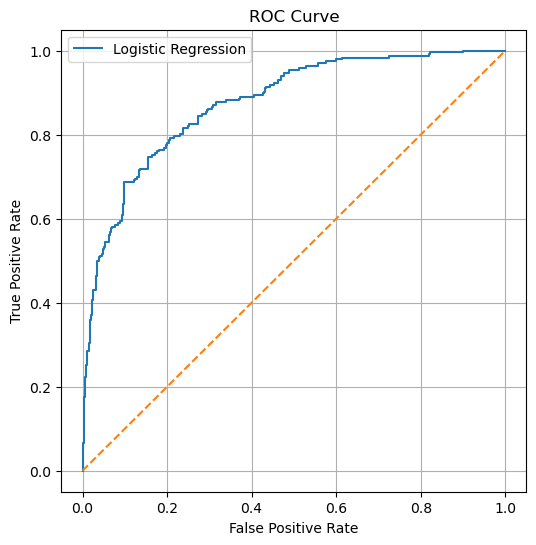

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)

plt.savefig("figures/roc_curve.png", dpi=150)
plt.show()


In [25]:
results = pd.DataFrame({
    "Model": ["Dummy (Most Frequent)", "Logistic Regression"],
    "Accuracy": [dummy_acc, log_acc],
    "ROC-AUC": [dummy_auc, log_auc]
})

results


,Model,Accuracy,ROC-AUC
0,Dummy (Most Frequent),0.59,0.500000
1,Logistic Regression,0.80,0.875649


## Итоговые выводы по сравнению моделей

***Базовая модель (DummyClassifier) показывает ожидаемые результаты: точность на уровне 0.59, что эквивалентно предсказанию самого частого класса, и ROC-AUC, равный 0.5, что указывает на полное отсутствие дискриминативной способности.***

***Логистическая регрессия демонстрирует значительное улучшение качества. Её точность возрастает до значения 0.8, а ROC-AUC достигает 0.87565, что свидетельствует о хорошей разделяющей силе модели.***

***Проведённый подбор гиперпараметра регуляризации C позволил оптимизировать результат. Слишком низкие значения C приводят к излишней регуляризации и недообучению модели, тогда как слишком высокие — увеличивают риск переобучения. Оптимальное значение C = 21.***

***Визуально ROC-кривая логистической регрессии проходит существенно выше диагональной линии, соответствующей случайному классификатору, что наглядно подтверждает её эффективность в различении клиентов с дефолтом и без него.***

***Таким образом, логистическая регрессия зарекомендовала себя как разумный и эффективный выбор для данной задачи: она сочетает простоту, интерпретируемость, устойчивость и существенно превосходит по качеству установленный бейзлайн.***